In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, butter, filtfilt
import numpy as np

def calculate_sampling_frequency(dataframe):
    frequencies = dataframe['timestamp_str_seconds'].value_counts()
    average_frequency = sum(frequencies) / len(frequencies)

    return average_frequency

def to_seconds(time_str):
    return (pd.to_datetime(time_str) - pd.to_datetime('00:00:00')).total_seconds()

def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    if high > 1:
        #high = 1
        print('No upper limit!')
        b, a = butter(order, low, btype='highpass')
        y = filtfilt(b, a, signal)
    else: 
        b, a = butter(order, [low, high], btype='bandpass')
        y = filtfilt(b, a, signal)
    return y

def lowpass_filter(signal, lowcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    b, a = butter(order, low, btype='lowpass')
    y = filtfilt(b, a, signal)
    return y



# Set the directory path
directory_path = "/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/SyncedFilesAll" #'C:\\Users\\fried\\Documents\\URI\\ELE_591\\syncedfiles\\syncedfiles'



result_P9_SSW4WearOS04_A1.csv


TypeError: 'value' must be an instance of str or bytes, not a float

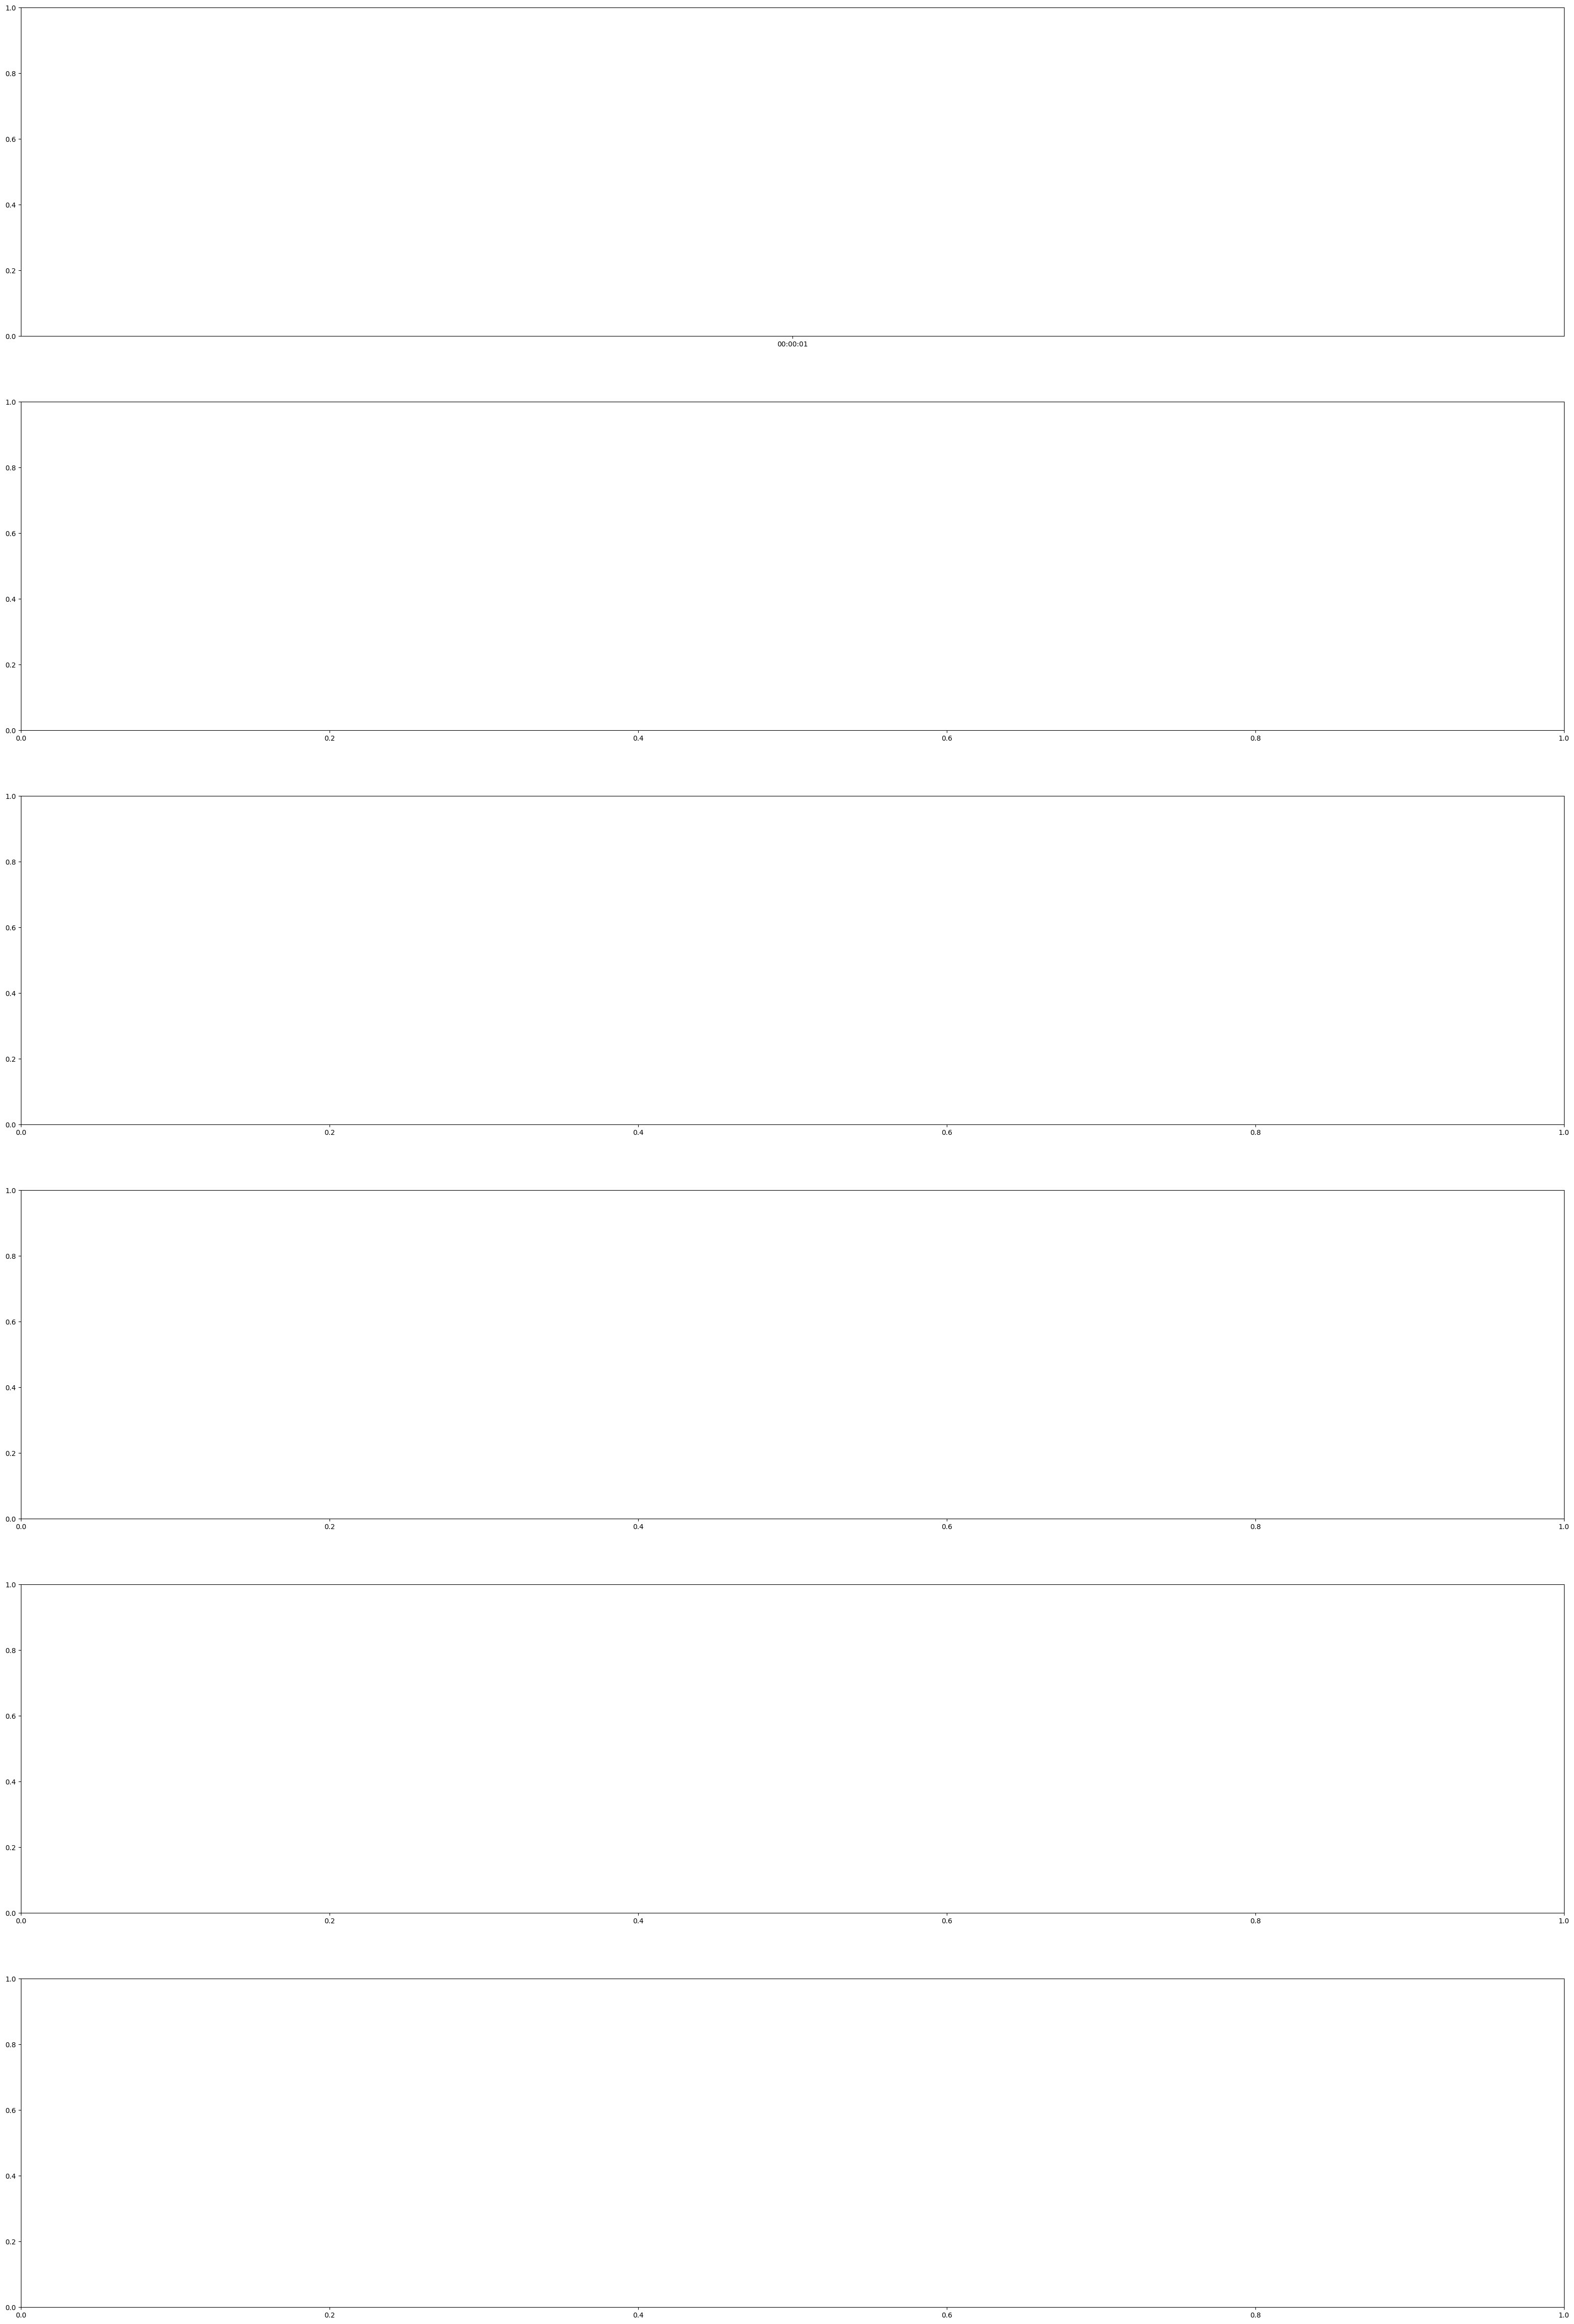

In [8]:


for i, filename in enumerate(os.listdir(directory_path)):
    if filename.endswith('.csv'):
    
        file_path = os.path.join(directory_path, filename)

        
        df = pd.read_csv(file_path, low_memory=False)
        print(filename)
        df['Hyperactive_Restless'] = pd.to_numeric(df['Hyperactive_Restless'], errors='coerce')

        
        fs = calculate_sampling_frequency(df)
        
        column_index_behavior = 23  
        column_data_behavior = df.iloc[:, column_index_behavior].replace(-100, 0)
        # column_data_behavior = df.iloc[:, column_index_behavior].replace(-100, 0).astype(float)

        
        columns = df.columns[4:13]
        df_filtered = pd.DataFrame()
        for col in columns:
                df_filtered[f'{col}_0_5Hz'] = lowpass_filter(df[col], 5.0, fs)
        for col in columns:
                df_filtered[f'{col}_5_10Hz'] = bandpass_filter(df[col], 5.0, 10.0, fs)

        df_filtered['Accel_Mag_0_5_Hz'] = np.sqrt(np.sum(df_filtered.iloc[:, 0:3] ** 2, axis = 1))
        df_filtered['Gyro_Mag_0_5_Hz'] = np.sqrt(np.sum(df_filtered.iloc[:, 3:6] ** 2, axis = 1))
        df_filtered['Magno_Mag_0_5_Hz'] = np.sqrt(np.sum(df_filtered.iloc[:, 6:9] ** 2, axis = 1))
        df_filtered['Accel_Mag_5_10_Hz'] = np.sqrt(np.sum(df_filtered.iloc[:, 9:12] ** 2, axis = 1))
        df_filtered['Gyro_Mag_5_10_Hz'] = np.sqrt(np.sum(df_filtered.iloc[:, 12:15] ** 2, axis = 1))
        df_filtered['Magno_Mag_5_10_Hz'] = np.sqrt(np.sum(df_filtered.iloc[:, 15:18] ** 2, axis = 1))
        
        
        #start_column_index = 4
        #end_column_index = 12
        start_column_index = 18
        end_column_index = 24
        
        #column_names = df.columns[30:]
        column_names = df_filtered.columns[18:]
        
        
        num_subplots = len(column_names)  
        fig, axs = plt.subplots(num_subplots, 1, figsize=(40, 10 * num_subplots))

        
        for i, column_name in enumerate(column_names, start=1):
            
            #column_data = df[column_name]
            column_data = df_filtered[column_name]
            frequencies, times, spectrogram_data = spectrogram(column_data, fs=fs)
            energy_spectrogram = np.sum(spectrogram_data, axis=0)

            
            ax1 = axs[i-1]
            ax1.plot(df['NewClock'], column_data_behavior, label='Hyperactive', linewidth=2)
            ax1.set_ylabel('Hyperactive Restless')
            ax1.tick_params('y')

            
            ax2 = ax1.twinx()
            ax2.plot(times, energy_spectrogram, color='red', label=f'Energy of Spectrogram {column_name}',linewidth=2)
            ax2.set_ylabel(f'Energy of Spectrogram {column_name}', color='red')

            # Set subplot title
            ax1.set_title(f'{column_name}', fontsize=25)

            # Set x-axis limits for all subplots
            ax1.set_xlim(df['NewClock'].iloc[0], '00:10:00')

           
            seconds = [to_seconds(time) for time in df["NewClock"]]
            interval = 600
            ax1.set_xticks(seconds[::interval])
            ax1.set_xticklabels(df["NewClock"][::interval], rotation=45, fontsize=30)
            ax1.set_xlabel('Elapsed Time', fontsize=25)

            
            ax1.legend(loc='upper left')

  
        fig.suptitle(filename, fontsize=40)

        # Adjust spacing between subplots
        fig.subplots_adjust(hspace=0.6)

  
        plt.show()

In [ ]:
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    if high > 1:
        #high = 1
        print('No upper limit!')
        b, a = butter(order, low, btype='highpass')
        y = filtfilt(b, a, signal)
    else: 
        b, a = butter(order, [low, high], btype='bandpass')
        y = filtfilt(b, a, signal)
    return y

for col in columns:
        df_filtered[f'{col}_5_10Hz'] = bandpass_filter(df[col], 5.0, 10.0, fs)
df_filtered.head()

TypeError: 'value' must be an instance of str or bytes, not a float

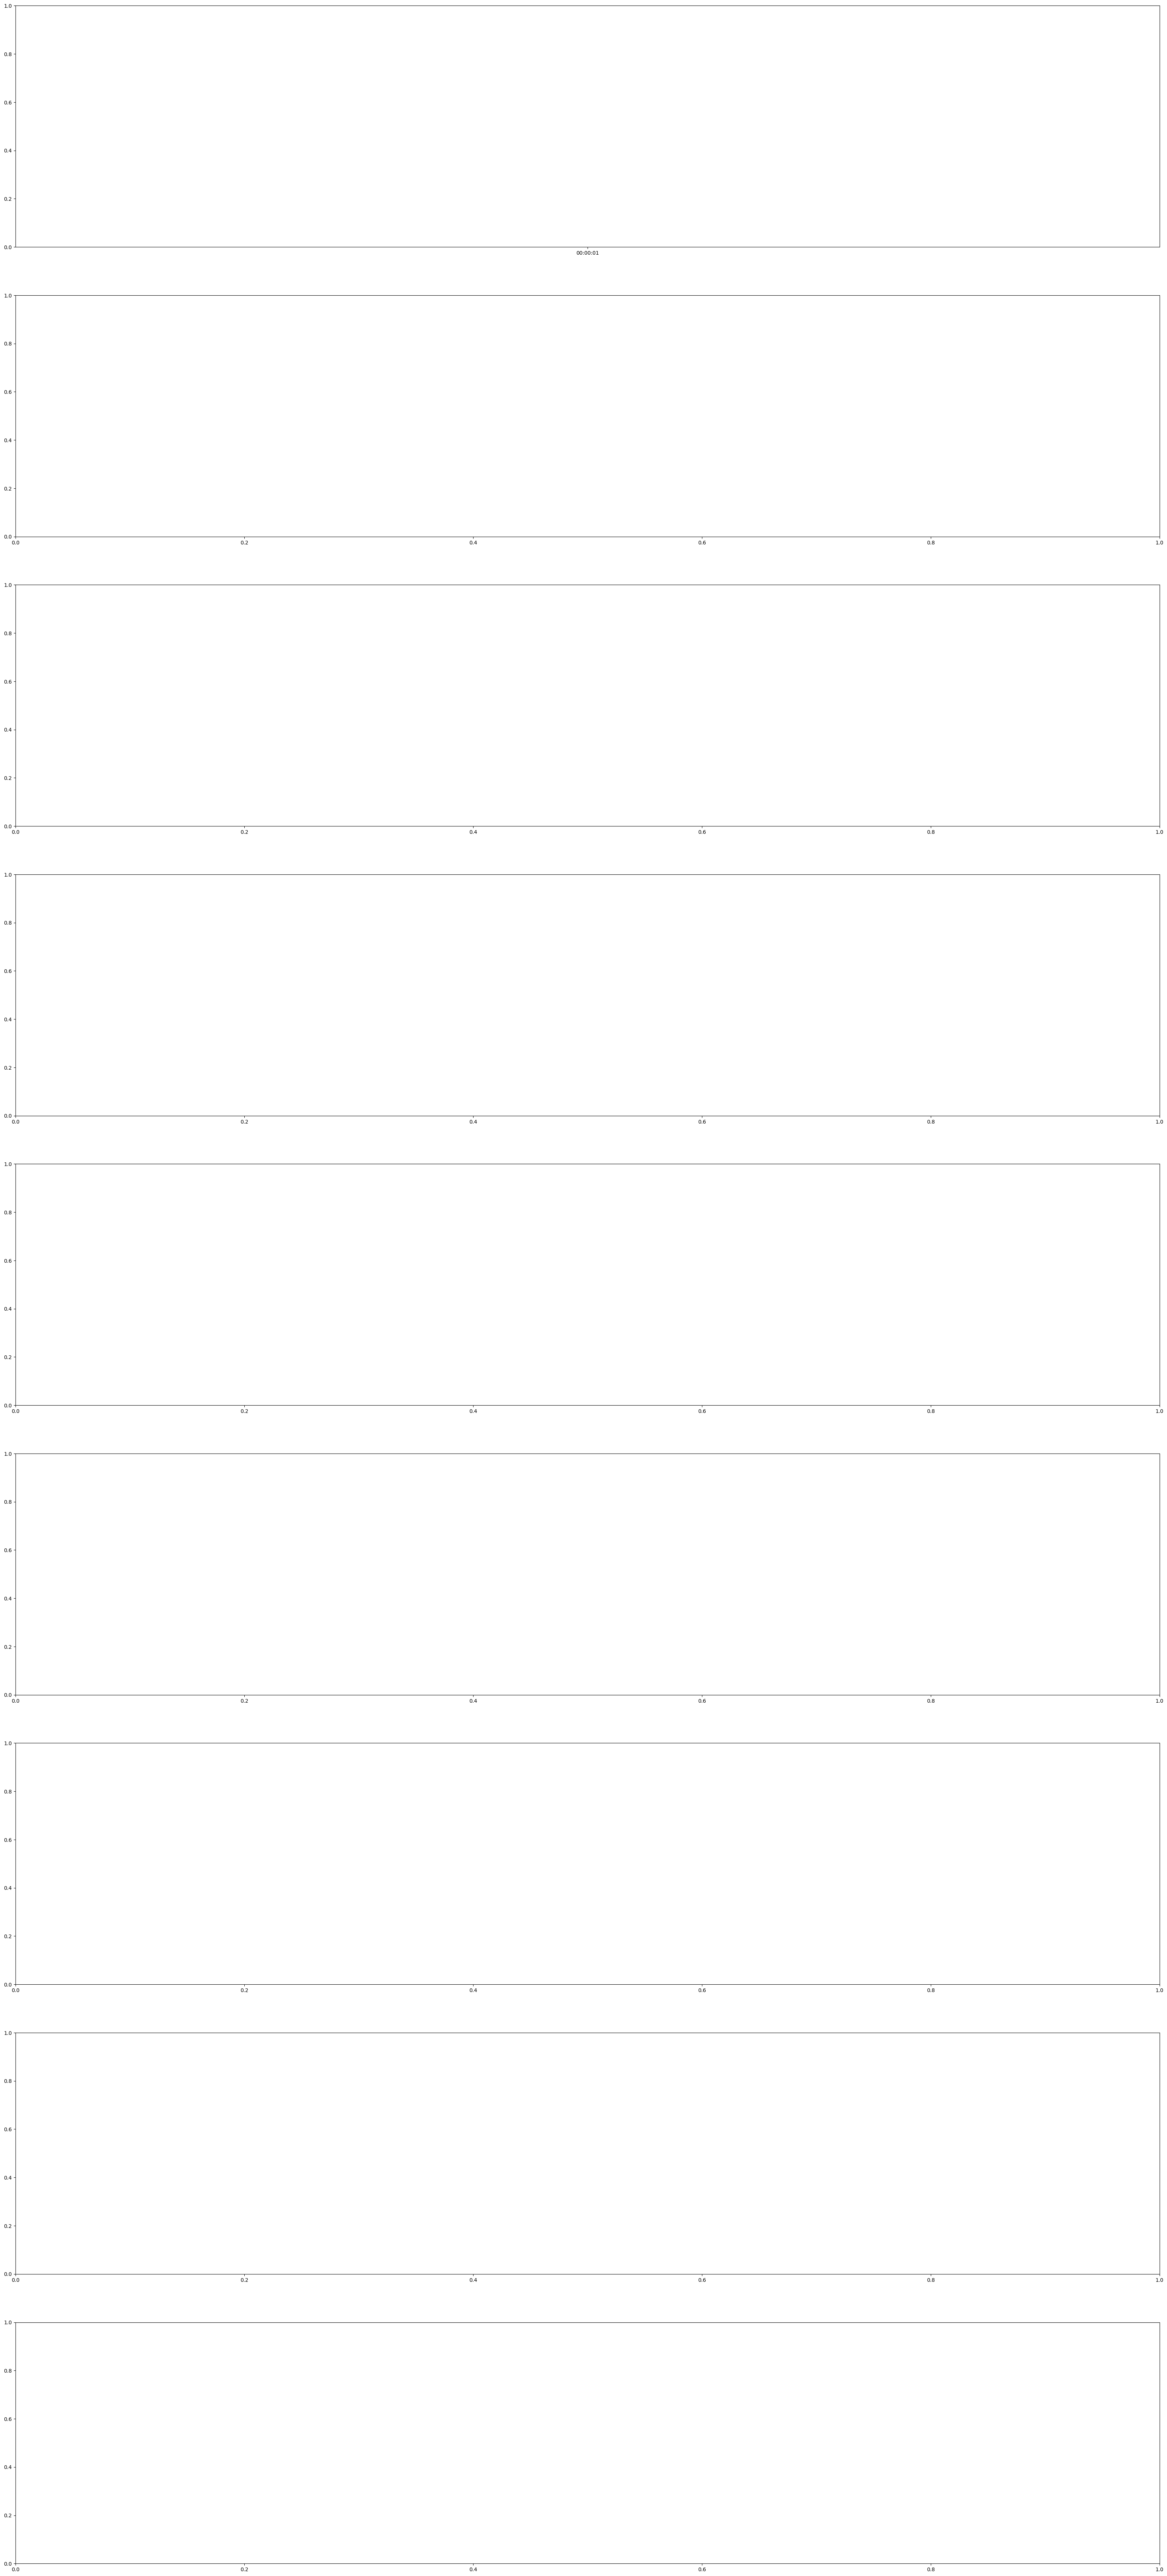

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import numpy as np

def calculate_sampling_frequency(dataframe):
    frequencies = dataframe['timestamp_str_seconds'].value_counts()
    average_frequency = sum(frequencies) / len(frequencies)

    return average_frequency

def to_seconds(time_str):
    return (pd.to_datetime(time_str) - pd.to_datetime('00:00:00')).total_seconds()

df = pd.read_csv('/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/SyncedFilesAll/result_P5_SSW4WearOS07_A1.csv', low_memory=False)

fs = calculate_sampling_frequency(df)


start_column_index = 4
end_column_index = 12
column_names = df.columns[start_column_index:end_column_index + 1]


num_subplots = len(column_names)  
fig, axs = plt.subplots(num_subplots, 1, figsize=(40, 10 * num_subplots))

column_index_behavior = 23  
column_data_behavior = df.iloc[:, column_index_behavior].replace(-100, 0)


for i, column_name in enumerate(column_names, start=1):
 
    column_data = df[column_name]
    frequencies, times, spectrogram_data = spectrogram(column_data, fs=fs)
    energy_spectrogram = np.sum(spectrogram_data, axis=0)

    # Create subplots
    ax1 = axs[i-1]
    ax1.plot(df['NewClock'], column_data_behavior, label='Hyperactive')
    ax1.set_ylabel('Hyperactive Restless')
    ax1.tick_params('y')

    # Create a twin Axes for the energy spectrogram
    ax2 = ax1.twinx()
    ax2.plot(times, energy_spectrogram, color='green', label=f'Energy of Spectrogram {column_name}')
    ax2.set_ylabel(f'Energy of Spectrogram {column_name}', color='green')

    # Set subplot title
    ax1.set_title(f'{column_name}', fontsize=25)

    # Set x-axis limits for all subplots
    ax1.set_xlim(df['NewClock'].iloc[0], '00:10:00')


    seconds = [to_seconds(time) for time in df["NewClock"]]
    interval = 600
    ax1.set_xticks(seconds[::interval])
    ax1.set_xticklabels(df["NewClock"][::interval], rotation=45, fontsize=30)
    ax1.set_xlabel('Elapsed Time')


    ax1.legend(loc='upper left')


fig.subplots_adjust(hspace=0.6)

# Show the plot
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

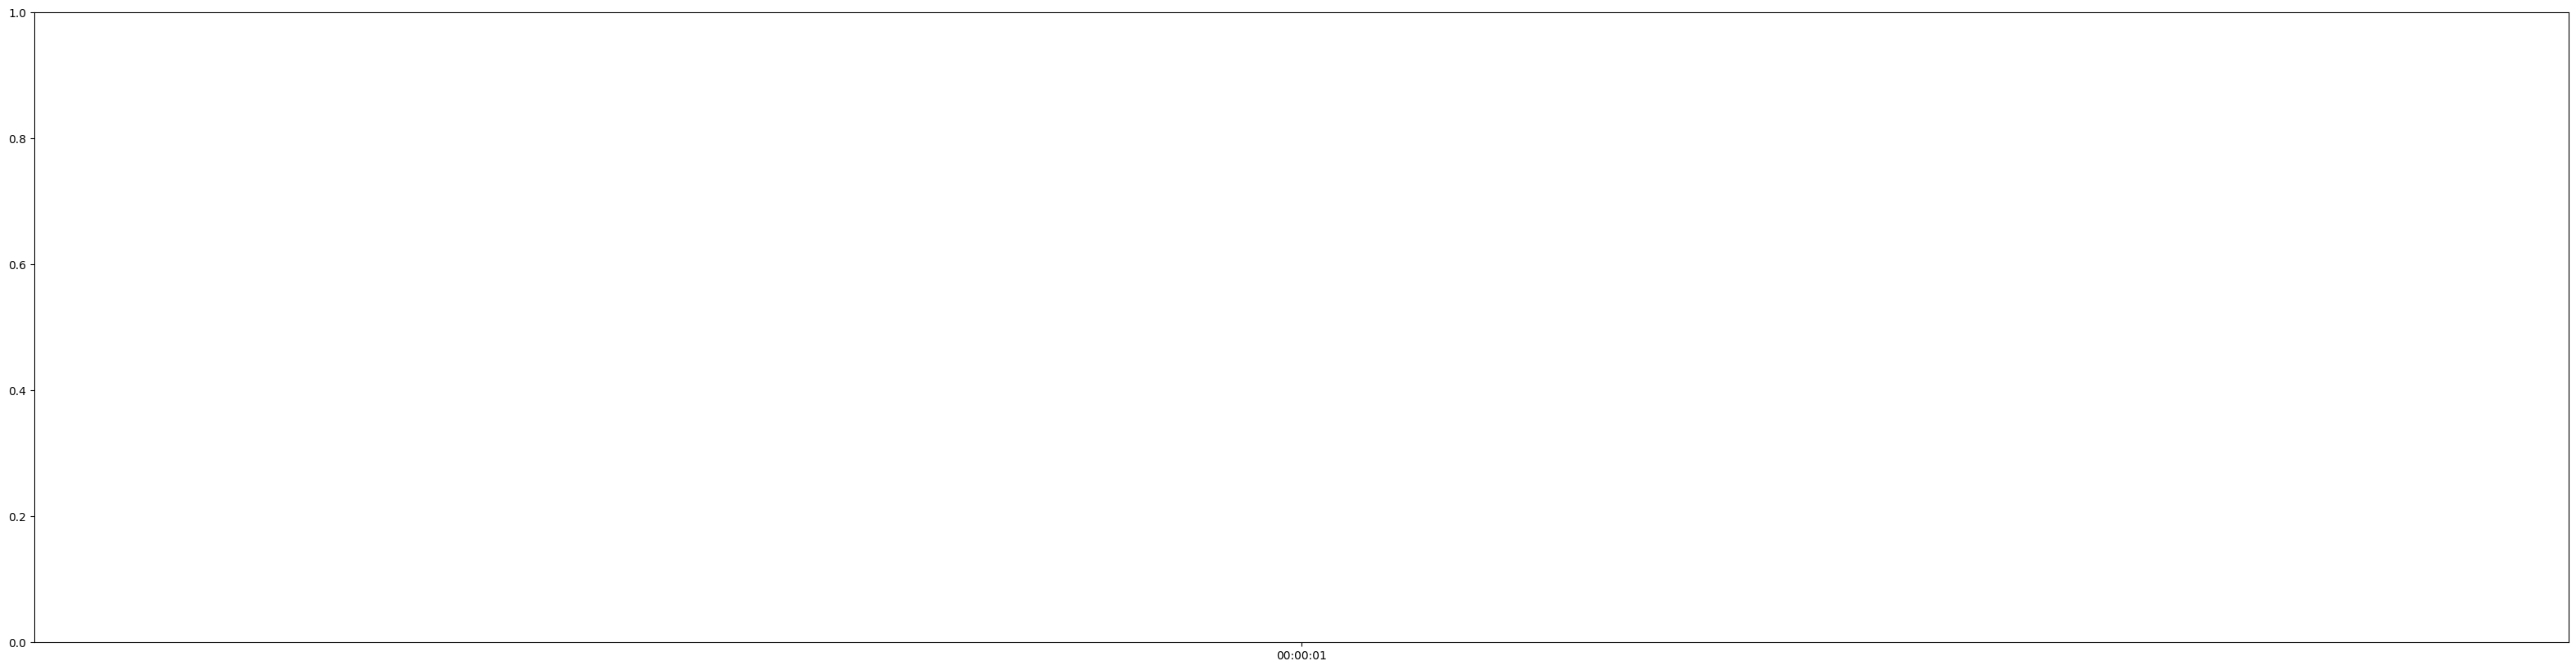

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import numpy as np

def calculate_sampling_frequency(dataframe):
    frequencies = dataframe['timestamp_str_seconds'].value_counts()
    average_frequency = sum(frequencies) / len(frequencies)

    return average_frequency

def to_seconds(time_str):
    return (pd.to_datetime(time_str) - pd.to_datetime('00:00:00')).total_seconds()

df = pd.read_csv('/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/SyncedFilesAll/result_P5_SSW4WearOS07_A1.csv', low_memory=False)

fs = calculate_sampling_frequency(df)

column_index = 4  
column_data = df.iloc[:, column_index]


frequencies, times, spectrogram_data = spectrogram(column_data, fs=fs)  
energy_spectrogram = np.sum(spectrogram_data, axis=0)  


column_index_behavior = 23  
#column_data_behavior = df.iloc[:, column_index_behavior]
column_data_behavior = df.iloc[:, column_index_behavior].replace(-100, 0)


plt.figure(figsize=(40, 10))

plt.plot(df['NewClock'], column_data_behavior, color='blue', label='Hyperactive')  
plt.xlabel('Timestamp')
#plt.plot(df.index, column_data_behavior, color='blue', label='Hyperactive')
#plt.xlabel('Index')
plt.ylabel('Hyperactive Restless', color='blue')
plt.tick_params('y', colors='blue')


plt.twinx()
plt.plot(times, energy_spectrogram, color='green', label='Energy of Spectrogram')
plt.ylabel('Energy of Spectrogram', color='green')

plt.xlim(df['NewClock'].iloc[0], '00:10:00')
# Set x-axis limits
#plt.xlim(df['NewClock'].iloc[0], '00:10:00')
seconds = [to_seconds(time) for time in df["NewClock"]]
interval = 600
plt.xticks(seconds[::interval], df["NewClock"][::interval], rotation=45, fontsize=30)  
plt.xlabel('Elapsed Time')



plt.subplots_adjust(bottom=0.2)



plt.legend(loc='upper left')


plt.show()


In [6]:
column_data_behavior.head()

0    Standing up while working 
1    Standing up while working 
2    Standing up while working 
3    Standing up while working 
4    Standing up while working 
Name: HyperactiveBehaviourType, dtype: object